# Introducción 
La diferencia de clases es una problemática muy grande en México. De acuerdo a Somosierra 2024, las clases sociales en México se definen como baja, media y alta; dichas categorías se basan del estatus económico y educativo de ciertos grupos, lo que indican su acceso a recursos, oportunidades y calidad general de vida. En la realidad capitalista, el ingreso laboral de una persona está altamente correlacionada a su experiencia, educación y en general desempeño laboral. Pero que pasa cuando una persona no tiene las mismas oportunidades de preparación laboral que una persona en ventaja? Hace unos meses en una cafetería, un señor que parecía estar en sus 50s me deslizo una nota con una pluma en mi mesa. La nota explicaba que es una persona sordamuda lo cual le complica obtener trabajo y vendía a plumas a 30 pesos. Últimamente, ha sido muy común que los papás de amistades/conocidos se queden sin trabajo a esta edad. Estas observaciones me lleva a buscar la inferencia entre que factores sociodemográficos explical el ingreso laboral de las personas en México. Para realizar esta inferencia, se explorarán datos de INEGI de su recopilación de datos de la Encuesta Nacional de Ingresos y Gastos de los Hogares, 2022. En esta encuesta se recopilan datos de ingreso, sociodemográficos, laborales, etc. En este estudio buscaremos características demográficos (edad, educación, salud, familia, etc.) que impactan estadísticamente el ingreso laboral de una persona utilizando principalmente modelos de regresión lineal múltiple y realizando una comparación con otro método no lineal. 

## Exploración de datos
INEGI divide los datos recopilados de su encuesta en diferentes CSV, lo que implica conectar un CSV de los valores demográficas por persona con una llave indicadora que se encuentra en el CSV de datos de ingresos. Al ser una encuesta masiva, no todas las personas tienen ingresos registrados en el archivo correspondiente, ya que el ingreso solo se captura para quienes reportaron alguna percepción económica.

Trabajando con "poblacion.csv" e "ingresos.csv", podemos ver que "poblacion.csv" tiene 309684 observaciones y 188 variables a tomar en cuenta mientras que "ingresos.csv" tiene 397182 duplas de datos. "poblacion.csv" tiene una gran cantidad de variables dado a que se utilizan muchos valores dependientes de otros. Es decir, si se indica que una persona tiene una enfermedad, habrá alrededor de 10 preguntas de seguimiento en caso de la respuesta de esa respuesta. Todas las variables que tienen en su mayoría o una gran cantidad de datos huecos en su variable o con intención altamente interaccional se descartan desde un inicio del reporte. 

Para combatir el desajuste de datos entre ambos archivos de datos y buscar sus llaves correspondientes, se realiza un código python que toma en cuenta su llave de identificación en ambas csv para unirlas de manera que cada ingreso quede con la persona correspondiente. Como es un estudio de ingreso laboral, se filtran las edades de los participantes de 18-65 años. 

Al final del código python, se crea un nuevo archivo csv con los datos combinados a los que aún les falta limpieza. 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

poblacion = pd.read_csv(
    "poblacion.csv",
    low_memory=False
)
poblacion.info()




<class 'pandas.DataFrame'>
RangeIndex: 309684 entries, 0 to 309683
Columns: 188 entries, folioviv to factor
dtypes: int64(12), str(176)
memory usage: 444.2 MB


In [82]:
ingresos = pd.read_csv(
    "ingresos.csv",
    low_memory=False
)
ingresos.info()


<class 'pandas.DataFrame'>
RangeIndex: 397182 entries, 0 to 397181
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   folioviv  397182 non-null  int64  
 1   foliohog  397182 non-null  int64  
 2   numren    397182 non-null  int64  
 3   clave     397182 non-null  str    
 4   mes_1     397182 non-null  str    
 5   mes_2     397182 non-null  str    
 6   mes_3     397182 non-null  str    
 7   mes_4     397182 non-null  str    
 8   mes_5     397182 non-null  str    
 9   mes_6     397182 non-null  str    
 10  ing_1     397182 non-null  int64  
 11  ing_2     397182 non-null  str    
 12  ing_3     397182 non-null  str    
 13  ing_4     397182 non-null  str    
 14  ing_5     397182 non-null  str    
 15  ing_6     397182 non-null  str    
 16  ing_tri   397182 non-null  float64
 17  entidad   397182 non-null  int64  
 18  est_dis   397182 non-null  int64  
 19  upm       397182 non-null  int64  
 20  factor    39718

In [27]:
## CODIGO GENERADO CON APOYO DE IA GENERATIVA

import pandas as pd
import numpy as np

# ============================================================
# 1️⃣ LEER INGRESOS (archivo ingresos.csv)
# ============================================================

print("Leyendo ingresos...")

ingresos = pd.read_csv(
    "ingresos.csv",
    usecols=['folioviv','foliohog','numren','ing_tri'],
    low_memory=False
)

# Convertir ingreso a número
ingresos['ing_tri'] = pd.to_numeric(ingresos['ing_tri'], errors='coerce')

# Quitar valores inválidos
ingresos = ingresos.dropna(subset=['ing_tri'])
ingresos = ingresos[ingresos['ing_tri'].notna()]

print("Filas de ingresos válidos:", ingresos.shape)


# ============================================================
# 2️⃣ COLAPSAR INGRESOS A NIVEL PERSONA
# (aquí ocurre la magia real de ENIGH)
# ============================================================

print("Agrupando ingresos por persona...")

ingresos_persona = (
    ingresos
    .groupby(['folioviv','foliohog','numren'], as_index=False)
    .agg(ingreso_total=('ing_tri','sum'))
)

print("Personas con ingreso:", ingresos_persona.shape)


# ============================================================
# 3️⃣ LEER POBLACIÓN
# ============================================================


import pandas as pd

print("Leyendo población...")

cols_disc = [
    "disc_camin","disc_ver","disc_brazo","disc_apren",
    "disc_oir","disc_vest","disc_habla","disc_acti"
]

poblacion = pd.read_csv(
    "poblacion.csv",
    usecols=[
       'folioviv','foliohog','numren','edad','sexo','nivelaprob','gradoaprob','alfabetism','edo_conyug','hijos_viv','diabetes','pres_alta','segsoc','pop_insabi','entidad',*cols_disc  
    ],
    low_memory=False
)

print("Personas en población:", poblacion.shape)

poblacion[cols_disc] = poblacion[cols_disc].replace(5, pd.NA)

# Asegurar que sean numéricas
poblacion[cols_disc] = poblacion[cols_disc].apply(pd.to_numeric, errors='coerce')

# Discapacidad = tener al menos UNA dificultad (niveles 2,3 o 4)
poblacion["Discapacidad"] = poblacion[cols_disc].apply(
    lambda row: row.isin([2, 3]).any(),
    axis=1
).astype(int)

print("\nDistribución real de discapacidad:")
print(poblacion["Discapacidad"].value_counts())

print("\nEjemplo de frecuencias por variable:")
for c in cols_disc:
    print("\n", c)
    print(poblacion[c].value_counts(dropna=False))

# ============================================================
# 4️⃣ FILTRAR EDAD LABORAL
# ============================================================

poblacion = poblacion[(poblacion['edad'] >= 18) & (poblacion['edad'] <= 65)]

print("Personas 18–65:", poblacion.shape)


# ============================================================
# 6️⃣ NOS QUEDAMOS SOLO CON VARIABLES NECESARIAS
# ============================================================

poblacion = poblacion[
    [
        'folioviv','foliohog','numren','edad','sexo',
        'nivelaprob','gradoaprob','alfabetism',
        'edo_conyug','hijos_viv',
        'diabetes','pres_alta','Discapacidad',
        'segsoc','pop_insabi',
        'entidad'
    ]
]

# ============================================================
# 7️⃣ MERGE CORRECTO (AHORA SÍ 1 A 1 REAL)
# ============================================================

print("Uniendo población con ingresos...")

df_final = poblacion.merge(
    ingresos_persona,
    on=['folioviv','foliohog','numren'],
    how='left'
)

df_final['ingreso_total'] = df_final['ingreso_total'].fillna(0)


print("Base final:", df_final.shape)


# ============================================================
# 8️⃣ TRANSFORMACIÓN PARA REGRESIÓN
# ============================================================

df_modelo = df_final.copy()

df_modelo['log_ingreso'] = np.log1p(df_modelo['ingreso_total'])

# Experiencia potencial tipo Mincer
df_modelo['edad2'] = df_modelo['edad']**2

df_modelo = pd.get_dummies(
    df_modelo,
    columns=[
        'edo_conyug','segsoc','entidad'
    ],
    drop_first=True
)

# ============================================================
# 9️⃣ GUARDAR BASE FINAL
# ============================================================

df_final.to_csv("base_enigh_modelo.csv", index=False)

print("Archivo creado: base_enigh_modelo.csv")


Leyendo ingresos...
Filas de ingresos válidos: (397182, 4)
Agrupando ingresos por persona...
Personas con ingreso: (205144, 4)
Leyendo población...
Personas en población: (309684, 23)

Distribución real de discapacidad:
Discapacidad
0    258489
1     51195
Name: count, dtype: int64

Ejemplo de frecuencias por variable:

 disc_camin
disc_camin
4.0    282619
3.0     15154
2.0      9456
1.0      2055
NaN       400
Name: count, dtype: int64

 disc_ver
disc_ver
4.0    284867
3.0     17278
2.0      6354
1.0       785
NaN       400
Name: count, dtype: int64

 disc_brazo
disc_brazo
4.0    298326
3.0      6970
2.0      3450
1.0       538
NaN       400
Name: count, dtype: int64

 disc_apren
disc_apren
4.0    295753
3.0      9563
2.0      3290
1.0       678
NaN       400
Name: count, dtype: int64

 disc_oir
disc_oir
4.0    297510
3.0      7729
2.0      3453
1.0       592
NaN       400
Name: count, dtype: int64

 disc_vest
disc_vest
4.0    302555
3.0      3318
2.0      2167
1.0      1244
NaN      

### Variables seleccionadas de los conjuntos de datos:
A pesar de aún no modelar el modelo, para no hacer uso excesivo a la memoria RAM y tener una vista más clara del modelo, desde un inicio se hizo la mayoría de  trabajo de selección de datos del modelo. En lugar de cargar las 188 variables disponibles en poblacion.csv, se utilizó el parámetro usecols de pandas para importar únicamente las columnas relevantes para el modelo 

#### Identificadores:
- folioviv — folio de la vivienda, identifica el hogar
- foliohog — folio del hogar dentro de la vivienda
- numren — número de renglón, identifica a cada persona dentro del hogar

#### Variables demográficas:
- edad — edad en años cumplidos
- sexo — 1=hombre, 2=mujer
- entidad — clave INEGI del estado (1=Aguascalientes ... 32=Zacatecas)
- edo_conyug — estado conyugal: 1=casado, 2=unión libre, 3=separado, 4=divorciado, 5=viudo, 6=soltero

#### Capital:
- nivelaprob — nivel educativo aprobado (0=ninguno, 1=preescolar... 8=posgrado)
- gradoaprob — grado aprobado dentro del nivel (0-6)
- alfabetism — 1=sabe leer y escribir, 2=no sabe

#### Familia:
- hijos_viv — número de hijos vivos

#### Salud:
- diabetes — 1=tiene diabetes, 2=no
- pres_alta — 1=tiene presión alta, 2=no
- Discapacidad — variable construida por ti: 1=tiene alguna limitación funcional, 0=no

#### Laboral/económico:
- segsoc — 1=tiene acceso a seguridad social (proxy de empleo formal), 2=no
- pop_insabi — 1=afiliado al INSABI (seguro), 2=no
- ingreso_total — ingreso trimestral total en pesos, construido sumando todas las fuentes de ingresos.csv


Explorando los datos iniciales, podemos identificar nuestra variable de interés ingreso con un promedio de 2.219780e+04, teniendo como outliers visibles 6.854754e+06 como mayor ingreso y un 0.00 de mínimo ingreso encontrado. 

In [98]:
df_final.describe()

,folioviv,foliohog,numren,edad,sexo,nivelaprob,gradoaprob,alfabetism,hijos_viv,diabetes,...,ingreso_total,educacion_total,alfabetizado,conyug_2,conyug_3,conyug_4,conyug_5,conyug_6,edad2,log_ingreso
count,1.902450e+05,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,...,1.902450e+05,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000
mean,1.625050e+09,1.013383,2.081989,39.108439,1.528187,3.870435,3.296355,1.037226,1.131588,0.366186,...,2.219780e+04,14.907661,0.962774,0.391232,0.069531,0.023848,0.029157,0.265799,1713.222103,7.847946
std,9.295705e+08,0.128593,1.218607,13.555555,0.499206,1.910031,1.426617,0.189315,1.726211,0.481762,...,4.698846e+04,5.904837,0.189315,0.488028,0.254356,0.152576,0.168247,0.441759,1104.933718,3.930650
min,1.000050e+08,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.000000,0.000000
25%,8.057185e+08,1.000000,1.000000,27.000000,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,...,2.360650e+03,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,729.000000,7.767116
50%,1.600953e+09,1.000000,2.000000,38.000000,2.000000,3.000000,3.000000,1.000000,0.000000,0.000000,...,1.538203e+04,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1444.000000,9.641020
75%,2.403772e+09,1.000000,3.000000,50.000000,2.000000,4.000000,4.000000,1.000000,2.000000,1.000000,...,2.866987e+04,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2500.000000,10.263637
max,3.260798e+09,5.000000,19.000000,65.000000,2.000000,9.000000,6.000000,2.000000,17.000000,1.000000,...,6.854754e+06,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4225.000000,15.740453


In [99]:
df.describe(include='object')


/var/folders/5k/22cx293161x_zcj11k6fhdc40000gn/T/ipykernel_10937/4084012645.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='object')


,hijos_viv,diabetes,pres_alta,segsoc,pop_insabi
count,190245,190245,190245,190245,190245
unique,19,3,3,3,3
top,,2,1,1,2
freq,89846,120450,106224,96988,162542


## Limpieza de datos
Checando el nuevo conjunto de datos, aún hay impurezas y datos a mejorar. Empezando por tipos de variable, a pesar de que la encuesta solo tiene datos númericos, el sistema registra algunos como datos tipo string los cuales serían imposibles de procesar a una regresión lineal. También buscamos ver que valores númericos tienen estas variables en strings. Algunas tienen valores nominales por lo que se aplica el método dummy para ajustarlas a una regresión lineal. Abajo también podemos encontrar las variables únicas que se encontraron en estas variables que se ajustaran. 

In [28]:
df = pd.read_csv("base_enigh_modelo.csv")
df_final.info()

<class 'pandas.DataFrame'>
RangeIndex: 190245 entries, 0 to 190244
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   folioviv       190245 non-null  int64  
 1   foliohog       190245 non-null  int64  
 2   numren         190245 non-null  int64  
 3   edad           190245 non-null  int64  
 4   sexo           190245 non-null  int64  
 5   nivelaprob     190245 non-null  str    
 6   gradoaprob     190245 non-null  str    
 7   alfabetism     190245 non-null  str    
 8   edo_conyug     190245 non-null  str    
 9   hijos_viv      190245 non-null  str    
 10  diabetes       190245 non-null  str    
 11  pres_alta      190245 non-null  str    
 12  Discapacidad   190245 non-null  int64  
 13  segsoc         190245 non-null  str    
 14  pop_insabi     190245 non-null  str    
 15  entidad        190245 non-null  int64  
 16  ingreso_total  190245 non-null  float64
dtypes: float64(1), int64(7), str(9)
memory u

,folioviv,foliohog,numren,edad,sexo,nivelaprob,gradoaprob,alfabetism,edo_conyug,Discapacidad,entidad,ingreso_total
count,1.902450e+05,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,1.902450e+05
mean,1.625050e+09,1.013383,2.081989,39.108439,1.528187,3.870435,3.296355,1.037226,3.047465,0.157571,16.002250,2.219780e+04
std,9.295705e+08,0.128593,1.218607,13.555555,0.499206,1.910031,1.426617,0.189315,1.950230,0.364339,9.297459,4.698846e+04
min,1.000050e+08,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00
25%,8.057185e+08,1.000000,1.000000,27.000000,1.000000,3.000000,3.000000,1.000000,2.000000,0.000000,8.000000,2.360650e+03
50%,1.600953e+09,1.000000,2.000000,38.000000,2.000000,3.000000,3.000000,1.000000,2.000000,0.000000,16.000000,1.538203e+04
75%,2.403772e+09,1.000000,3.000000,50.000000,2.000000,4.000000,4.000000,1.000000,6.000000,0.000000,24.000000,2.866987e+04
max,3.260798e+09,5.000000,19.000000,65.000000,2.000000,9.000000,6.000000,2.000000,6.000000,1.000000,32.000000,6.854754e+06


In [33]:
df.describe(include='object')

cols = ['nivelaprob','gradoaprob','hijos_viv','diabetes','pres_alta','segsoc','pop_insabi','alfabetism','edo_conyug']

for c in cols:
    print(f"\n===== {c} =====")
    print(df_final[c].unique())



===== nivelaprob =====
[4 7 3 5 8 6 2 0 9 1]

===== gradoaprob =====
[3 5 4 2 6 1 0]

===== hijos_viv =====
[ 1.  2.  0.  4.  3.  5.  6.  7.  9.  8. 10. 11. 14. 12. 13. 17. 15. 16.]

===== diabetes =====
[0 1]

===== pres_alta =====
[1 0]

===== segsoc =====
[0 1]

===== pop_insabi =====
[0 1]

===== alfabetism =====
<StringArray>
['1', '2']
Length: 2, dtype: str

===== edo_conyug =====
<StringArray>
['6', '2', '1', '5', '4', '3']
Length: 6, dtype: str


/var/folders/5k/22cx293161x_zcj11k6fhdc40000gn/T/ipykernel_10937/1516873817.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='object')


In [60]:
cols_str = [
    'nivelaprob','gradoaprob','hijos_viv',
    'diabetes','pres_alta','segsoc','pop_insabi','alfabetism','edo_conyug'
]

df_final[cols_str] = df_final[cols_str].replace(r'^\s*$', np.nan, regex=True)

for c in cols_str:
    df_final[c] = pd.to_numeric(df_final[c], errors='coerce')

df_final['hijos_viv'] = df_final['hijos_viv'].fillna(0)


df_final['diabetes']   = (df_final['diabetes'] == 1).astype(int)
df_final['pres_alta']  = (df_final['pres_alta'] == 1).astype(int)


df_final['segsoc'] = (df_final['segsoc'] == 1).astype(int)

df_final['pop_insabi'] = (df_final['pop_insabi'] == 1).astype(int)

df_final['nivelaprob'] = df_final['nivelaprob'].fillna(0)
df_final['gradoaprob'] = df_final['gradoaprob'].fillna(0)

df_final['nivelaprob'] = df_final['nivelaprob'].fillna(0)
df_final['gradoaprob'] = df_final['gradoaprob'].fillna(0)

### transformación de nivelaprob y gradoaprob
df_final['educacion_total'] = df_final['nivelaprob'] * 3 + df_final['gradoaprob']

df_final['alfabetism'] = df_final['alfabetism'].replace(' ', np.nan)
df_final['alfabetism'] = pd.to_numeric(df_final['alfabetism'], errors='coerce')

# Crear variable binaria interpretable
df_final['alfabetizado'] = (df_final['alfabetism'] == 1).astype(int)

df_final['edo_conyug'] = df_final['edo_conyug'].replace(' ', np.nan)
df_final['edo_conyug'] = pd.to_numeric(df_final['edo_conyug'], errors='coerce')

df_final = pd.get_dummies(
    df_final,
    columns=['edo_conyug'],
    prefix='conyug',
    drop_first=True
)


KeyError: "['edo_conyug'] not in index"

Primer cambio, se muestran las variables de manera que se puedan procesar a una regresión lineal. Las variables son enteros (int64), decimales(float64) o booleanas(teniendo variables 0 o 1). La variable de estado conyugal originalmente estaba codificada como una sola variable categórica con seis valores posibles (1=casado, 2=unión libre, 3=separado, 4=divorciado, 5=viudo, 6=soltero). Dado que estos valores no tienen un orden jerárquico económico, no se puede tratarla como variable numérica continua. Por ello se convierte en variables booleanas.

In [36]:
df_final.info()

df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 190245 entries, 0 to 190244
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   folioviv         190245 non-null  int64  
 1   foliohog         190245 non-null  int64  
 2   numren           190245 non-null  int64  
 3   edad             190245 non-null  int64  
 4   sexo             190245 non-null  int64  
 5   nivelaprob       190245 non-null  int64  
 6   gradoaprob       190245 non-null  int64  
 7   alfabetism       190245 non-null  int64  
 8   hijos_viv        190245 non-null  float64
 9   diabetes         190245 non-null  int64  
 10  pres_alta        190245 non-null  int64  
 11  Discapacidad     190245 non-null  int64  
 12  segsoc           190245 non-null  int64  
 13  pop_insabi       190245 non-null  int64  
 14  entidad          190245 non-null  int64  
 15  ingreso_total    190245 non-null  float64
 16  educacion_total  190245 non-null  int64  
 17  al

,folioviv,foliohog,numren,edad,sexo,nivelaprob,gradoaprob,alfabetism,edo_conyug,Discapacidad,entidad,ingreso_total
count,1.902450e+05,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,190245.000000,1.902450e+05
mean,1.625050e+09,1.013383,2.081989,39.108439,1.528187,3.870435,3.296355,1.037226,3.047465,0.157571,16.002250,2.219780e+04
std,9.295705e+08,0.128593,1.218607,13.555555,0.499206,1.910031,1.426617,0.189315,1.950230,0.364339,9.297459,4.698846e+04
min,1.000050e+08,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00
25%,8.057185e+08,1.000000,1.000000,27.000000,1.000000,3.000000,3.000000,1.000000,2.000000,0.000000,8.000000,2.360650e+03
50%,1.600953e+09,1.000000,2.000000,38.000000,2.000000,3.000000,3.000000,1.000000,2.000000,0.000000,16.000000,1.538203e+04
75%,2.403772e+09,1.000000,3.000000,50.000000,2.000000,4.000000,4.000000,1.000000,6.000000,0.000000,24.000000,2.866987e+04
max,3.260798e+09,5.000000,19.000000,65.000000,2.000000,9.000000,6.000000,2.000000,6.000000,1.000000,32.000000,6.854754e+06


### Outliers

Tras tener todas las variables de manera númerica, se identifican outliers en la variable de ingreso, lo que es lógico dado a la realidad de desigualdad en México, hay valores extremadamento altos de ingreso y otros que tienen marcado un 0 en su encuesta. Para que los valores no impacten negativamente al modelo, se aplica una función logaritmica a la variable de ingreso_total, para minimizar el impacto de los valores atipicos. 

Valores como grado y nivel de aprobación se ignoran dado que se confirmo en la exploración inicial de datos que no sobrepasan los límites proporcionados por la ENIGH. También se ignoran outliers detectados que en realidad son valores dummy. 

In [44]:
# ============================================================
# 🔎 DETECCIÓN DE OUTLIERS (IQR METHOD)
# ============================================================

print("\nDetectando outliers con método IQR...")

# Seleccionar solo variables numéricas
num_cols = df_final.select_dtypes(include=['int64','float64']).columns

outlier_summary = []

for col in num_cols:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_final[(df_final[col] < lower_bound) | (df_final[col] > upper_bound)]

    outlier_summary.append({
        "Variable": col,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Limite_inferior": lower_bound,
        "Limite_superior": upper_bound,
        "Num_Outliers": outliers.shape[0],
        "Porcentaje_Outliers": (outliers.shape[0] / df_final.shape[0]) * 100
    })

outlier_table = pd.DataFrame(outlier_summary)

print("\nResumen de outliers por variable:")
print(outlier_table.sort_values(by="Num_Outliers", ascending=False))


col = "ingreso_total"

Q1 = df_final[col].quantile(0.25)
Q3 = df_final[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_ingreso = df_final[(df_final[col] < lower) | (df_final[col] > upper)]

print("\nOutliers en ingreso_total:", outliers_ingreso.shape[0])



Detectando outliers con método IQR...

Resumen de outliers por variable:
           Variable            Q1            Q3           IQR  \
16  educacion_total  1.200000e+01  1.500000e+01  3.000000e+00   
5        nivelaprob  3.000000e+00  4.000000e+00  1.000000e+00   
6        gradoaprob  3.000000e+00  4.000000e+00  1.000000e+00   
24      log_ingreso  7.767116e+00  1.026364e+01  2.496521e+00   
11     Discapacidad  0.000000e+00  0.000000e+00  0.000000e+00   
13       pop_insabi  0.000000e+00  0.000000e+00  0.000000e+00   
19         conyug_3  0.000000e+00  0.000000e+00  0.000000e+00   
15    ingreso_total  2.360650e+03  2.866987e+04  2.630922e+04   
17     alfabetizado  1.000000e+00  1.000000e+00  0.000000e+00   
7        alfabetism  1.000000e+00  1.000000e+00  0.000000e+00   
21         conyug_5  0.000000e+00  0.000000e+00  0.000000e+00   
8         hijos_viv  0.000000e+00  2.000000e+00  2.000000e+00   
20         conyug_4  0.000000e+00  0.000000e+00  0.000000e+00   
1          folio

In [105]:
df_final['log_ingreso'] = np.log1p(df_final['ingreso_total'])

# Ahora sí verificar
##print(df_final[['log_ingreso','edad2','Discapacidad','educacion_total']].describe())
print("\nPersonas con ingreso > 0:", (df_final['ingreso_total'] > 0).sum())
print("Personas con ingreso = 0:", (df_final['ingreso_total'] == 0).sum())


Personas con ingreso > 0: 154390
Personas con ingreso = 0: 35855


Con relación a la detección de outliers, también se identifica la población de encuestados en casa que no tienen ingreso registrado, localizando aproximadamente 20% de la población. 

#### Colinealidad
Al analizar la matriz de correlación, se identificaron correlaciones bajas entre la mayoría de las variables explicativas e ingreso_total, siendo nivelaprob la de mayor correlación con 0.19. Se decidió no eliminar observaciones basándose únicamente en la correlación, ya que correlaciones bajas en análisis sugiere que no existe multicolinealidad entre variables. Las únicas variables que tienen alto nivel de 
colinealidad, son las variables de "folioviv" e "identidad", que se excluyen del modelo ya que solo sirven como identificadores. 

Se identifica correlación a la variable de edad con la variable de hijos vivos, indicando la correlación entre mujeres y que baja el ingreso dependiendo sus hijos. 
educacion_total tiene correlaciópn alta con gradoaprob y nivelaprob, ya que es una transformación de variables creada con grado de aprobación y nivel educativo, ya que grado de aprobaciónse identifica dentro del nivel. Se excluirán grado y nivel para el estudio y se utilizará la nueva variable identificada. 

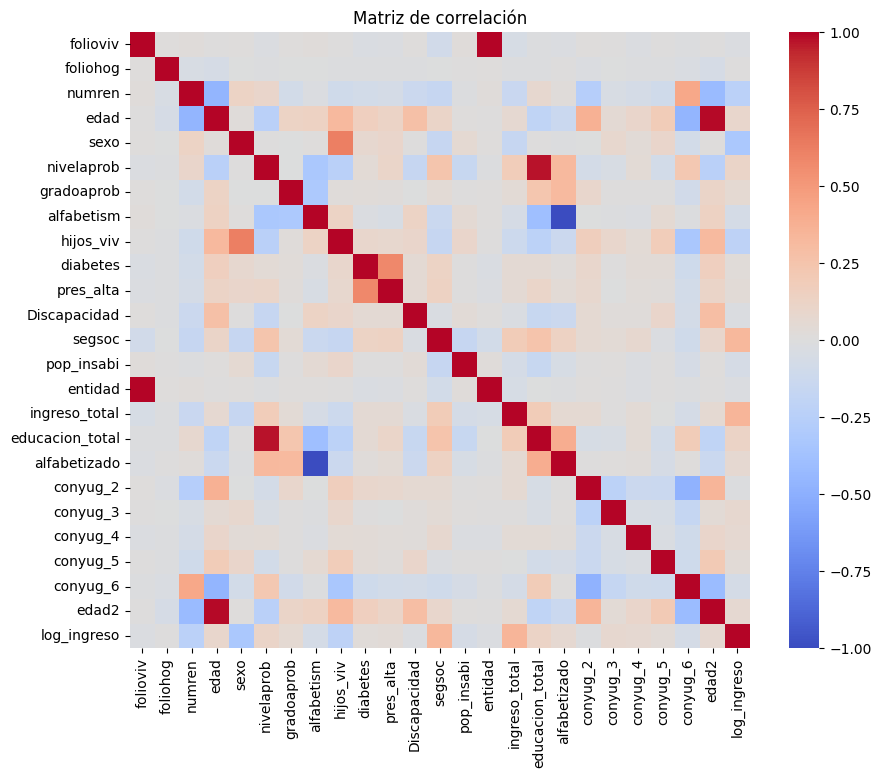

In [106]:
corr_matrix = df_final.corr(numeric_only=True)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

### Huecos
En la exploración inicial se realizó un código inicial en el que se juntaron las CSV de ingreso y población de manera que solo existan datos completos en cuanto a información de población como ingreso. A pesar de esto, se checa si no existen huecos en el conjunto de datos. Con las variables seleccionadas, se utilizaron variables que la mayoría de la población tiene una respuesta o se puede determinar como verdadero o falso. 

In [97]:
print(df_final.isnull().sum())

folioviv           0
foliohog           0
numren             0
edad               0
sexo               0
nivelaprob         0
gradoaprob         0
alfabetism         0
hijos_viv          0
diabetes           0
pres_alta          0
Discapacidad       0
segsoc             0
pop_insabi         0
entidad            0
ingreso_total      0
educacion_total    0
alfabetizado       0
conyug_2           0
conyug_3           0
conyug_4           0
conyug_5           0
conyug_6           0
edad2              0
log_ingreso        0
dtype: int64


### Selección de variables
El proceso de selección de variables comenzó antes del modelado, directamente desde la exploración del conjunto de datos. De las 188 variables disponibles en poblacion.csv, se aplicaron tres criterios de descarte inicial.
Primero, variables con alta proporción de valores faltantes. ENIGH utiliza un diseño de cuestionario condicional donde ciertas preguntas solo aplican si una respuesta previa fue positiva. Esto genera columnas con la mayoría de sus valores vacíos para el resto de la población. Estas variables se descartaron por no ser representativas del conjunto total.
Segundo, variables de seguimiento o interacción. Por ejemplo, al preguntar si una persona tiene diabetes, se generan aproximadamente diez preguntas adicionales de seguimiento. Estas variables son dependientes de la respuesta anterior y no aportan información independiente al modelo.
Tercero, variables identificadores. Columnas como folioviv, foliohog y numren son llaves de identificación del diseño muestral, no características del individuo, por lo que se excluyeron del modelo.
Con estos criterios se redujo el espacio de variables a un subconjunto de características medibles y de interés para el analisis de la población: edad, sexo, nivel educativo, condición de discapacidad, estado civil, número de hijos, condición de salud, acceso a seguridad social y entidad. 
Después de la selección inicial desde la exploración, para la selección formal de variables del modelo final, se aplicó el método de eliminación hacia atrás, eliminando variables iterativamente con el p-valor más alto, si es mayor a 0.05. Aunque las únicas variables que se excluyeron del estudio fue "analfabetismo" y "pop_insabi" en el modelo polinomial.

### Construcción y comparación de modelos

#### Modelo Lineal
Se utilizan para la variables explicativas las variables:
    'edad', 'sexo', 'educacion_total', 'hijos_viv',
    'diabetes', 'pres_alta', 'Discapacidad', 'segsoc',
    'conyug_2', 'conyug_3', 'conyug_5', 'conyug_6'

y como variables de interés: log_ingreso. Llamamos a la función de regresión lineal de ols. Se aplico el método de división de datos en entrenamiento y prueba para evaluar el desempeño del modelo para explicar nuevos datos. 

In [90]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X = df_final[[
    'edad', 'sexo', 'educacion_total', 'hijos_viv',
    'diabetes', 'pres_alta', 'Discapacidad', 'segsoc',
    'conyug_2', 'conyug_3', 'conyug_5', 'conyug_6'
]]
y = df_final['log_ingreso']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# MODELO LINEAL
modelo_lineal = smf.ols('''
log_ingreso ~ edad + sexo + educacion_total + hijos_viv +
diabetes + pres_alta + Discapacidad + segsoc +
conyug_2 + conyug_3 + conyug_5 + conyug_6
''', data=df_final.loc[X_train.index]).fit()

print(modelo_lineal.summary())

y_pred_train = modelo_lineal.predict(df_final.loc[X_train.index])
y_pred_test = modelo_lineal.predict(df_final.loc[X_test.index])

print('MAE_TRAIN:', mean_absolute_error(y_train, y_pred_train))
print('MAE_TEST:', mean_absolute_error(y_test, y_pred_test))
print('RMSE_TRAIN:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE_TEST:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

                            OLS Regression Results                            
Dep. Variable:            log_ingreso   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3370.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        09:04:14   Log-Likelihood:            -4.0636e+05
No. Observations:              152196   AIC:                         8.127e+05
Df Residuals:                  152183   BIC:                         8.129e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.8050      0.055    1

#### Modelo No Lineal
Se utilizan para la variables explicativas las variables: edad + edad2 + sexo + educacion_total + hijos_viv + diabetes + pres_alta + Discapacidad + segsoc + conyug_2 + conyug_3 + conyug_5 + conyug_6, y como variables de interés: log_ingreso. Llamamos a la función de regresión lineal de ols. Al igual que el modelo linea, se aplico el método de división de datos en entrenamiento y prueba para evaluar el desempeño del modelo para explicar nuevos datos. 

In [91]:
# MODELO NO LINEAL (polinomial con edad²)
modelo_nolineal = smf.ols('''
log_ingreso ~ edad + edad2 + sexo + educacion_total + hijos_viv +
diabetes + pres_alta + Discapacidad + segsoc +
conyug_2 + conyug_3 + conyug_5 + conyug_6
''', data=df_final.loc[X_train.index]).fit()

print(modelo_nolineal.summary())

y_pred_train_nl = modelo_nolineal.predict(df_final.loc[X_train.index])
y_pred_test_nl = modelo_nolineal.predict(df_final.loc[X_test.index])

print('MAE_TRAIN:', mean_absolute_error(y_train, y_pred_train_nl))
print('MAE_TEST:', mean_absolute_error(y_test, y_pred_test_nl))
print('RMSE_TRAIN:', np.sqrt(mean_squared_error(y_train, y_pred_train_nl)))
print('RMSE_TEST:', np.sqrt(mean_squared_error(y_test, y_pred_test_nl)))

                            OLS Regression Results                            
Dep. Variable:            log_ingreso   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     3293.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        09:04:44   Log-Likelihood:            -4.0543e+05
No. Observations:              152196   AIC:                         8.109e+05
Df Residuals:                  152182   BIC:                         8.110e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.1046      0.101     

### Evaluación del desempeño del modelo

#### Métricas De Modelo Lineal 
MAE_TRAIN: 2.6387153181548184
MAE_TEST: 2.6408679330196145
RMSE_TRAIN: 3.472643221096823
RMSE_TEST: 3.4739075410300004
R-cuadrada: 0.210 


#### Métricas De Modelo No Lineal 
- MAE_TRAIN: 2.656764589108097
- MAE_TEST: 2.6600192807335032
- RMSE_TRAIN: 3.493935299133626
- RMSE_TEST: 3.495213243075673
- R-cuadrada: 0.220
- 
El modelo no lineal resulta más adecuado para este problema porque incorpora el comportomaiento de la relación entre edad e ingreso. Aunque la mejora en R² es poca (de 0.210 a 0.220), por la significancia estadística de ambos coeficientes y por la reducción en el error de predicción sobre datos no vistos



### Modelo final 
Comparando ambos modelos, el **modelo de regresión de segundo grado** el ajusta mejor al ciclo de vida del ingreso en la mayoría de la población. El modelo de segundo grado obtuvo una mejor R-cuadrada y métricas para el comportamiento del ingreso. Terminamos con una R-cuadrada de 0.22 indicando que el modelo solo explica el 22% de variabilidad del comportamiento de la variable de interés, sin embargo en el caso de ingreso poblacional dado que depende de más variables fuera de características demográficas para explicar el comportamiento de ingresos. Se implicaría de un conjunto de datos mucho más extenso con más consideraciones para explicar el mercado laboral sin embargo, este modelo nos sirve para entender que variables de la población tienen impacto estadístico en el ingreso laboral. Según lo que se encontró del modelo, las siguientes variables tienen más impacto estadístico en el desempeño de ingresos de una persona:

- edad = 0.2235 
Cada año adicional de edad aumenta el log-ingreso en 0.22 unidades. El efecto es positivo y muy preciso dado el intervalo estrecho. Sin embargo, este efecto decrece con la edad por el término cuadrático.
- edad2 = -0.0025 
Confirma la curva de ciclo de vida. El ingreso crece con la edad pero a ritmo decreciente hasta llegar a un pico y luego caer. Ambos intervalos no cruzan cero, el efecto es estadísticamente robusto.
- Edad pico = -0.2235 / (2 × -0.0025) = ~44.7 años. Después de esa edad el ingreso empieza a decrecer.

- sexo = -2.1422 
Ser mujer reduce el log-ingreso en 2.14 unidades, equivalente a ~88% menos ingreso (e^-2.14 - 1). Intervalo muy estrecho, la brecha de género es el efecto más grande y más preciso del modelo.

- educacion_total = 0.0522. Cada unidad adicional de educación aumenta el ingreso ~5.4%. Retorno positivo y significativo, consistente con teoría de capital humano.

- Discapacidad = -0.1892. Tener discapacidad reduce el ingreso entre 13% y 21% con 95% de confianza. El intervalo es completamente negativo, sin cruzar cero. Efecto real, no aleatorio.

- segsoc = 1.8467. Tener seguridad social aumenta el ingreso en (e^1.85 - 1). Es el coeficiente más grande después de sexo y el más preciso del modelo. Captura la brecha formal/informal en México.

- hijos_viv = -0.1056. Cada hijo adicional reduce el ingreso ~10%. Efecto negativo y significativo, posiblemente refleja mayor carga de cuidados especialmente en mujeres.

- diabetes = -0.0768. Reduce el ingreso ~7.4%. Intervalo más amplio que otras variables pero no cruza cero.

- pres_alta = 0.1465. Positivo y significativo. Es correcional con perfiles de mayor edad y laboral formal.


Uno de las variables más significativas es de la brecha de **formalidad laboral**. Tener acceso a seguridad social, empleo formal, está asociado con ingresos mayores, controlando por todos los demás factores. Esto refleja la dualidad estructural del mercado laboral mexicano, donde la economía informal atrapa a muchos trabajadores de la población a baja remuneración sin tomar en cuenta su preparación.

La **brecha de género** es igualmente alarmante. Ser mujer está asociado con un ingreso menor que los hombres en condiciones equivalentes. Esta es la asociación más grande y más precisa del modelo, con un intervalo de confianza estrecho , lo que indica que la desigualdad de género en el mercado laboral mexicano es un fenómeno el que no se puede negar.

Respecto a la **discapacidad**, que motivó la pregunta de investigación original, el modelo estima con 95% de confianza que las personas con alguna limitación funcional perciben entre 13% y 21% menos ingreso que personas sin discapacidad bajo las mismas condiciones sociodemográficas. 

Concluyendo a la comparación de ambos modelos de regresión, el **modelo de regresión de segundo grado** se ajusta mejor al ciclo de vida del ingreso en la mayoría de la población, de acuerdo a su edad, alcanzando una edad pico en 45.4 años. Espinosa J. 2025, confirma que las las personas de entre 40 y 49 años registran el monto promedio más alto, recopilando datos de INEGI. Comparando con el modelo mostrado en este analisis, el pico encontrado fue de 45.4 años. 

Fuentes respaldando el pico encontrado:
- Espinosa, J. (2025, agosto 12). Este es el rango de edad de las personas con mayores ingresos en México, según el INEGI. infobae. https://www.infobae.com/mexico/2025/08/12/este-es-el-rango-de-edad-de-las-personas-con-mayores-ingresos-en-mexico-segun-el-inegi/ 
- Cabrera, I. (2025, septiembre). Msn.com. Recuperado el 19 de febrero de 2026, de https://www.msn.com/es-mx/dinero/noticias/este-es-el-rango-de-edad-de-las-personas-con-mayores-ingresos-en-m%C3%A9xico-seg%C3%BAn-el-inegi/ar-AA1Kpuhe
- Evolución, D. (2023, agosto 6). Inegi revela cuánto debe ganar un mexicano según su edad. Diario Evolución. https://www.diarioevolucion.com.mx/inegi-revela-cuanto-debe-ganar-un-mexicano-segun-su-edad/ 


In [104]:
beta_edad = modelo_nolineal.params['edad']
beta_edad2 = modelo_nolineal.params['edad2']
edad_pico = -beta_edad / (2 * beta_edad2)
print(f"Edad de ingreso máximo: {edad_pico:.1f} años")


Edad de ingreso máximo: 45.4 años


### Caso especifico de uso comportamiento
Mencionando la observación inicial de introducción, se aplica un caso en el que se llenan las mismas variables para dos personas, con la única diferencia siendo que una persona es discapacitada y otra no. Podemos ver que el comportamiento esta relativamente cerca pero el cambio de probabilidades es más drástica a las edades de 35-55. 

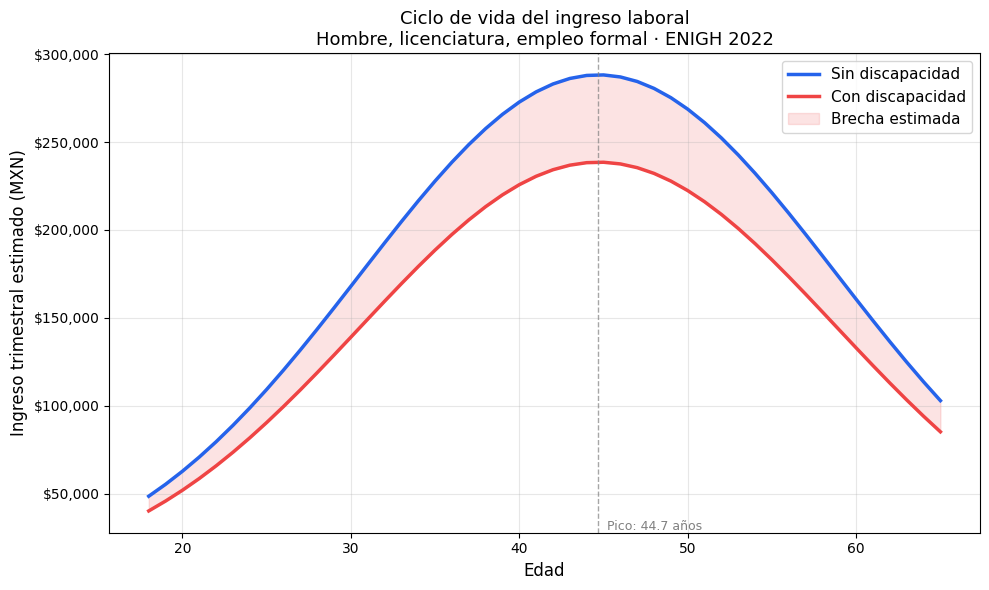

In [103]:
import numpy as np
import matplotlib.pyplot as plt

perfil_base = {
    'sexo': 1,
    'educacion_total': 14,
    'hijos_viv': 1,
    'diabetes': 0,
    'pres_alta': 0,
    'segsoc': 1,
    'conyug_2': 0, 'conyug_3': 0, 'conyug_5': 0, 'conyug_6': 0
}

edades = np.arange(18, 66)
edades2 = edades ** 2

def ingreso_predicho(edad, edad2, discapacidad):
    log_y = (5.1046
        + 0.2235 * edad
        + (-0.0025) * edad2
        + (-2.1422) * perfil_base['sexo'] * 0  # sexo=1 hombre, coef solo aplica a mujer
        + 0.0522 * perfil_base['educacion_total']
        + (-0.1056) * perfil_base['hijos_viv']
        + (-0.0768) * perfil_base['diabetes']
        + 0.1465 * perfil_base['pres_alta']
        + (-0.1892) * discapacidad
        + 1.8467 * perfil_base['segsoc'])
    return np.expm1(log_y)

y_sin = ingreso_predicho(edades, edades2, discapacidad=0)
y_con = ingreso_predicho(edades, edades2, discapacidad=1)

# Gráfica
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(edades, y_sin, color='#2563eb', linewidth=2.5, label='Sin discapacidad')
ax.plot(edades, y_con, color='#ef4444', linewidth=2.5, label='Con discapacidad')
ax.fill_between(edades, y_con, y_sin, alpha=0.15, color='#ef4444', label='Brecha estimada')

# Línea de edad pico
edad_pico = round(-0.2235 / (2 * -0.0025), 1)
ax.axvline(edad_pico, color='gray', linestyle='--', linewidth=1, alpha=0.7)
ax.text(edad_pico + 0.5, ax.get_ylim()[0] * 1.05, f'Pico: {edad_pico} años',
        color='gray', fontsize=9)

ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Ingreso trimestral estimado (MXN)', fontsize=12)
ax.set_title('Ciclo de vida del ingreso laboral\nHombre, licenciatura, empleo formal · ENIGH 2022',
             fontsize=13)
ax.legend(fontsize=11)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Conclusión
Los resultados del modelo de regresión no lineal aplicado a 152,196 personas en edad laboral de la ENIGH 2022 permiten identificar factores sociodemográficos que explican las diferencias de ingreso en México. El objetivo de este modelo no es maximizar la capacidad predictiva medida por R², sino identificar y cuantificar la asociación entre características individuales y el ingreso laboral. En modelos de inferencia econométrica con microdatos de encuestas nacionales, un R² de 0.21 es consistente con la literatura sobre determinantes del ingreso en países en desarrollo, donde una fracción importante de la variabilidad de ingreso responde a factores no observables como habilidades, redes sociales o condiciones del mercado local. Lo relevante son la significancia estadística y la interpretación económica de los coeficientes estimados.
El modelo no lineal confirma que el ingreso crece con la edad pero tiene un pico en el cual empieza a decrecer el ingreso. Esto tiene implicaciones prácticas para políticas de empleo dirigidas a adultos mayores de 50 años, grupo vulnerable al desempleo en México, en especial considerando que la mayoría de este grupo son padres de familia que tienen familias que mantener.
##### Limitaciones del conjunto
Los resultados no deben interpretarse como hallazgos definitivos del mercado laboral sino interpretar las variables encontradas como significativas en el acceso a recursos y calidad de vida por persona. Además de esto, la ENIGH restringe su muestra a hogares, excluyendo población en situación de calle o en otras condiciones. Dado que las personas con discapacidad severa tienen mayor probabilidad de estar en estas condiciones, el efecto estimado de discapacidad sobre el ingreso probablemente subestima la brecha real en la población total.
Adicionalmente, los coeficientes representan asociaciones estadísticas, no relaciones causales. Variables omitidas de condiciones del mercado laboral podrían estar correlacionadas con las variables incluidas, introduciendo sesgo en el modelo general. El R² de 0.22 confirma que una fracción importante de la variabilidad del ingreso responde a factores que no se observan en los conjuntos de datos utilizados de la encuesta.
##### Líneas de trabajo futuro
En un futuro, sería mejor incorporar más CSV de condiciones socioeconómicas que ofrece la misma encuesta como por ejemplo: gastoshogar, hogares, trabajos, etc. Para este estudio se limito el uso de datos a sociodemográficas en relación a su ingreso. Si se incluyen el resto de datos que ofrece la ENIGH se podria identificar con mayor precisión la trayectoria laboral. También sería significativo encontrar más modelos que se ajusten a distintas brechas que faltan por explorar en la problemática masiva de diferencia de clases. 

Referencias:

Espinosa, J. (2025, agosto 12). Este es el rango de edad de las personas con mayores ingresos en México, según el INEGI. infobae. https://www.infobae.com/mexico/2025/08/12/este-es-el-rango-de-edad-de-las-personas-con-mayores-ingresos-en-mexico-segun-el-inegi/

Evolución, D. (2023, agosto 6). Inegi revela cuánto debe ganar un mexicano según su edad. Diario Evolución. https://www.diarioevolucion.com.mx/inegi-revela-cuanto-debe-ganar-un-mexicano-segun-su-edad/

Instituto Nacional de Estadística y Geografía. (s/f). Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) 2022. Nueva serie [Data set].

MSN. (s/f). Msn.com. Recuperado el 19 de febrero de 2026, de https://www.msn.com/es-mx/dinero/noticias/este-es-el-rango-de-edad-de-las-personas-con-mayores-ingresos-en-m%C3%A9xico-seg%C3%BAn-el-inegi/ar-AA1Kpuhe

Somosierra, R. (2024, julio 26). Clases sociales en México: cuáles son y cómo se definen. El Blog de Pulpos. https://pulpos.com/blog/clases-sociales-mexico/

(S/f). Apa.org. Recuperado el 19 de febrero de 2026, de https://www.apa.org/pi/ses/resources/publications/education

Utilizado para código de limpieza, merge, predicción y cuartiles
OpenAI. (2023). ChatGPT (versión 2026). https://chat.openai.com/chat
